# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib notebook
plt.style.use('ggplot')


# inline
# %matplotlib inline

In [2]:
# Objective 1: Loading the data (which is stored in the file train.csv)
df = pd.read_csv('train.csv')

In [3]:
# initial look at the data
df.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [4]:
# objective 2:
# Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


<IPython.core.display.Javascript object>


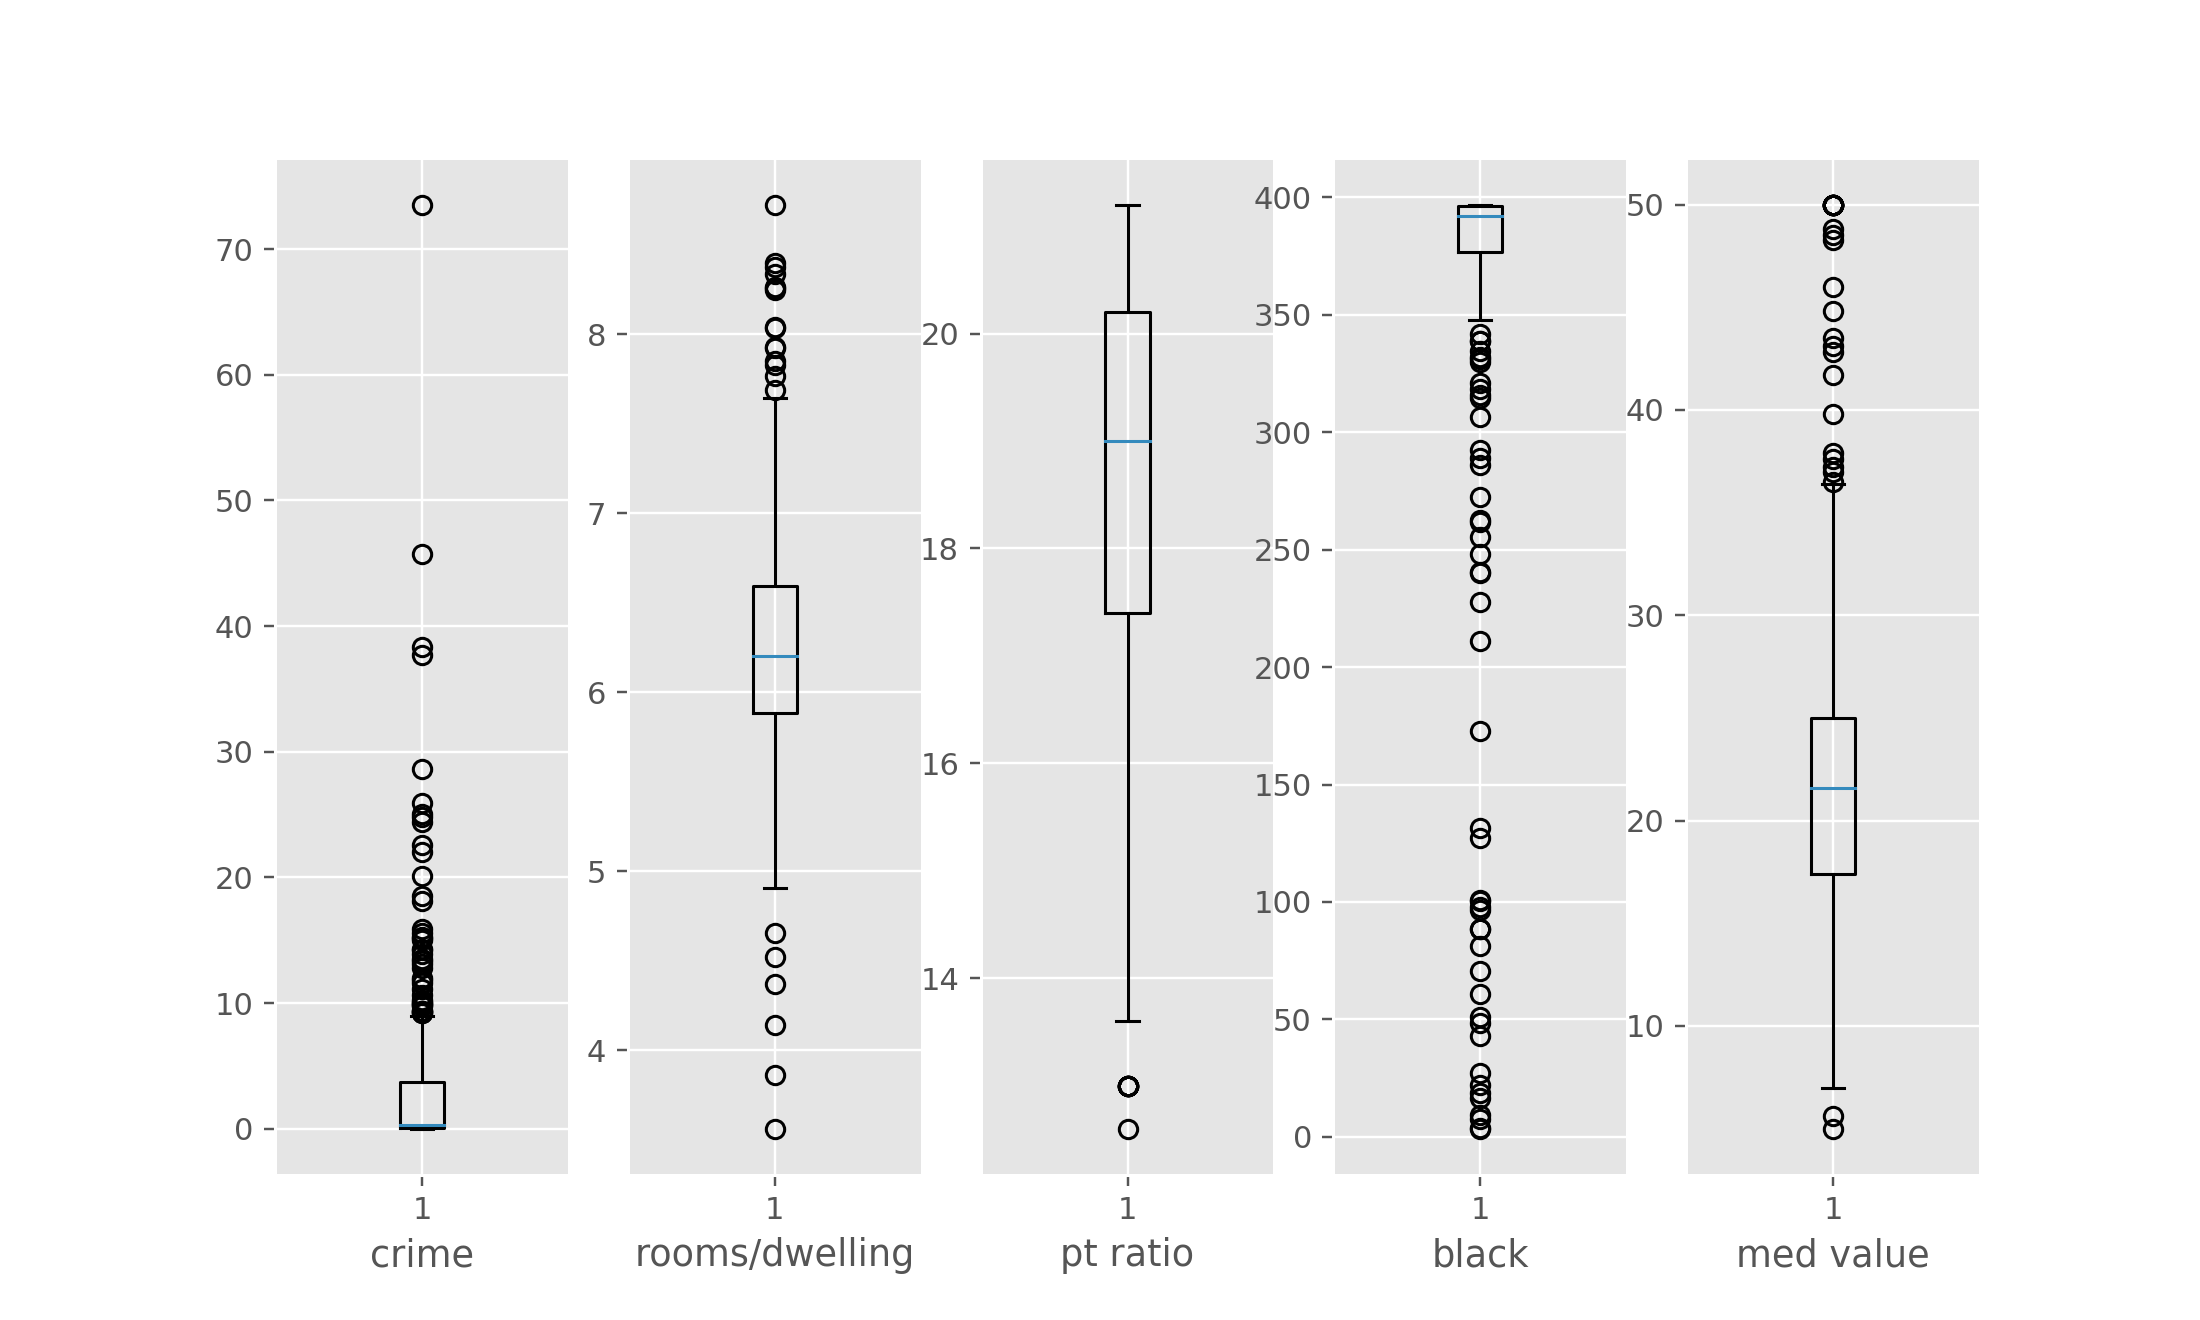

Text(0.5,0,'med value')

In [5]:
# look at some boxplots

# not working
fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_subplot(151)
ax2 = fig1.add_subplot(152)
ax3 = fig1.add_subplot(153)
ax4 = fig1.add_subplot(154)
ax5 = fig1.add_subplot(155)


ax1.boxplot(df['crim'], )
ax2.boxplot(df['rm'])
ax3.boxplot(df['ptratio'])
ax4.boxplot(df['black'])
ax5.boxplot(df['medv'])

ax1.set_xlabel('crime')
ax2.set_xlabel('rooms/dwelling')
ax3.set_xlabel('pt ratio')
ax4.set_xlabel('black')
ax5.set_xlabel('med value')

In [6]:
# objective 3:
# Create meaningful subsets of the data using selection operations using .loc, .iloc or related operations. 
# Explain why you used the chosen subsets and do this for 3 possible 2-way splits. 
# State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. 

<IPython.core.display.Javascript object>


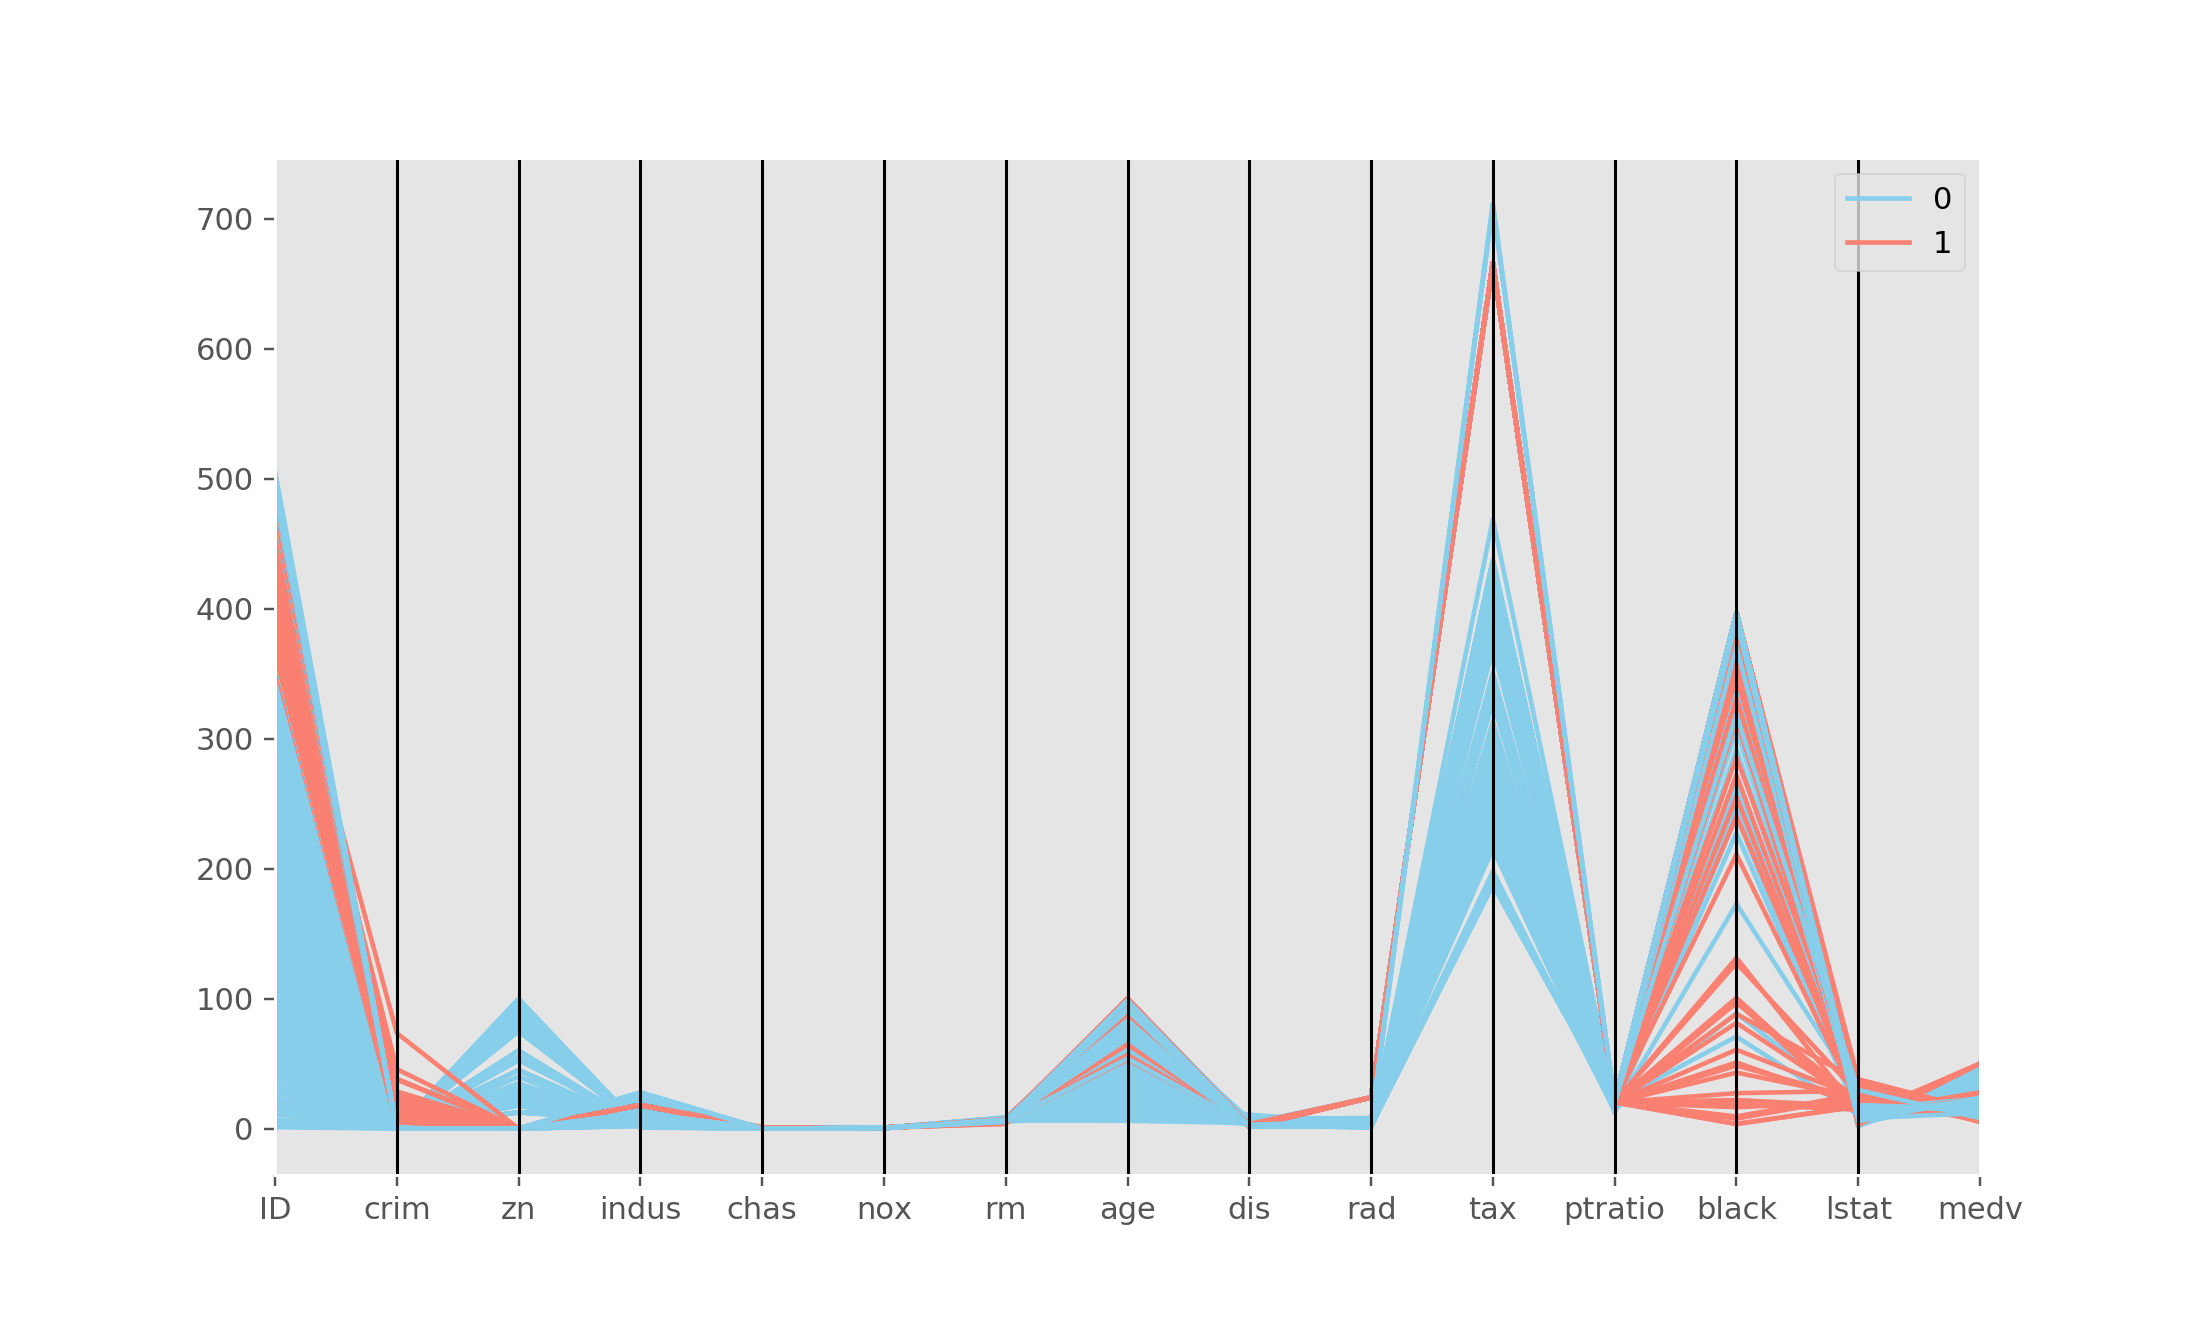

In [7]:
# split on crime, make a new column, 1 = bottom 25% crime rate, 0 = top 75% crime rate
# 75th percentile crime = 3.678220

df['top25crime'] = df['crim'].map(lambda x: 1 if x > 3.678220 else 0)

colormap = ('skyblue', 'salmon')
fig2 = plt.figure(figsize=(10,6))
ax1 = fig2.add_subplot(111)

plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(df, 'top25crime', color=colormap);

<IPython.core.display.Javascript object>


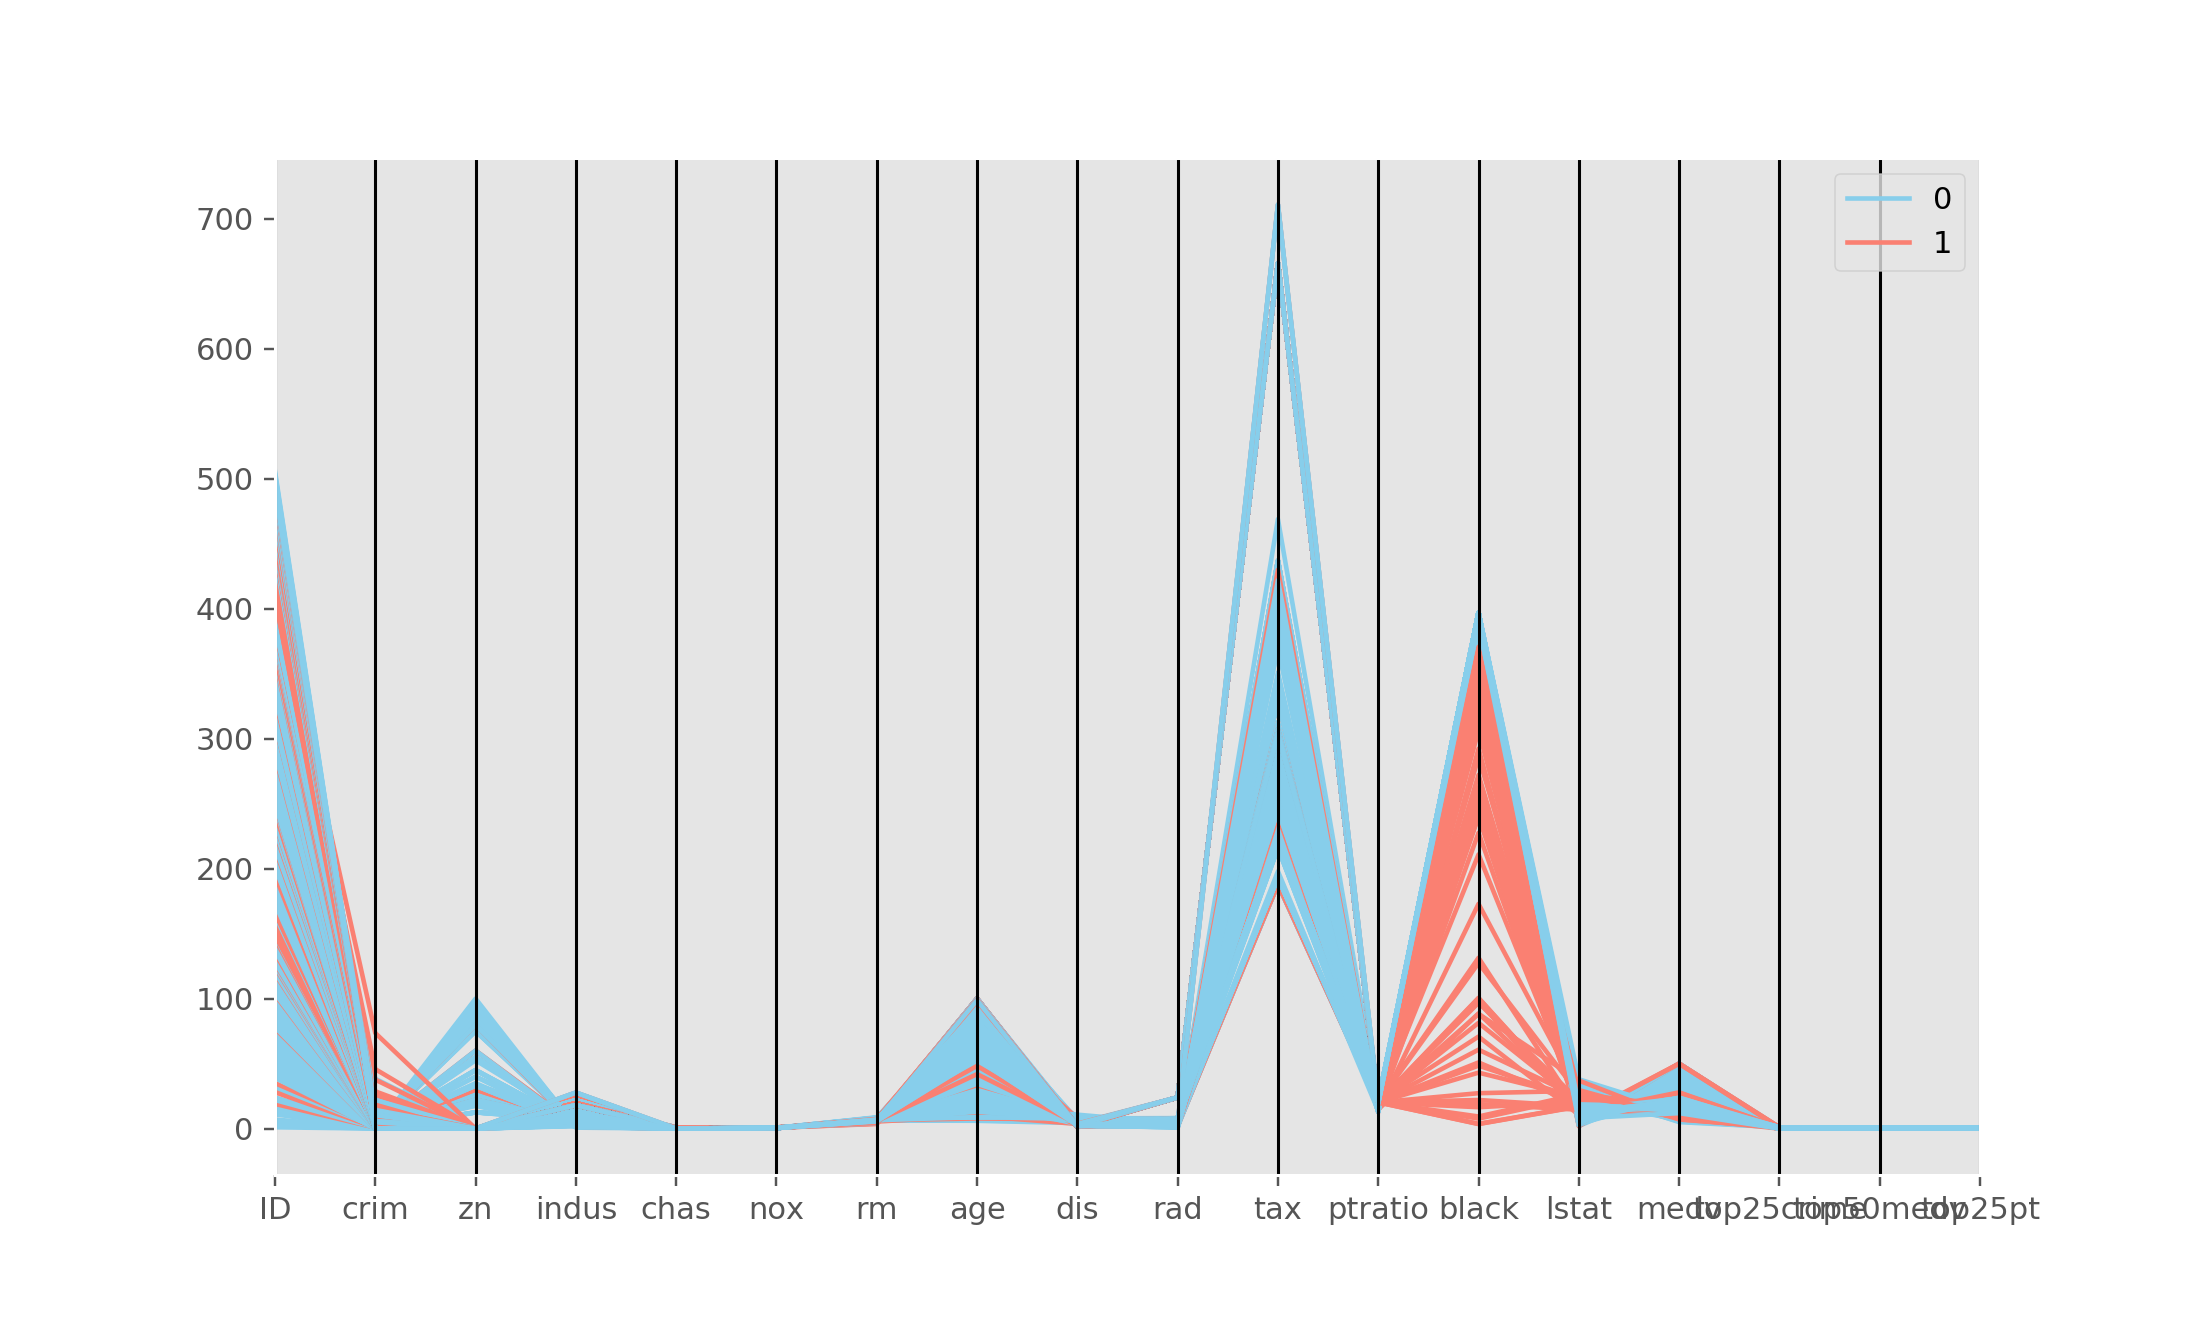

In [15]:
# split on black, make a new column, 1 = bottom 25% black, 0 = top 75% black
# 25th percentile = 376.730000

df['bottom25black'] = df['black'].map(lambda x: 1 if x < 376.73 else 0)

colormap = ('skyblue', 'salmon')
# fig3 = plt.figure(figsize=(10,6))
# ax1 = fig3.add_subplot(111)
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(df, 'bottom25black', color=colormap);

<IPython.core.display.Javascript object>


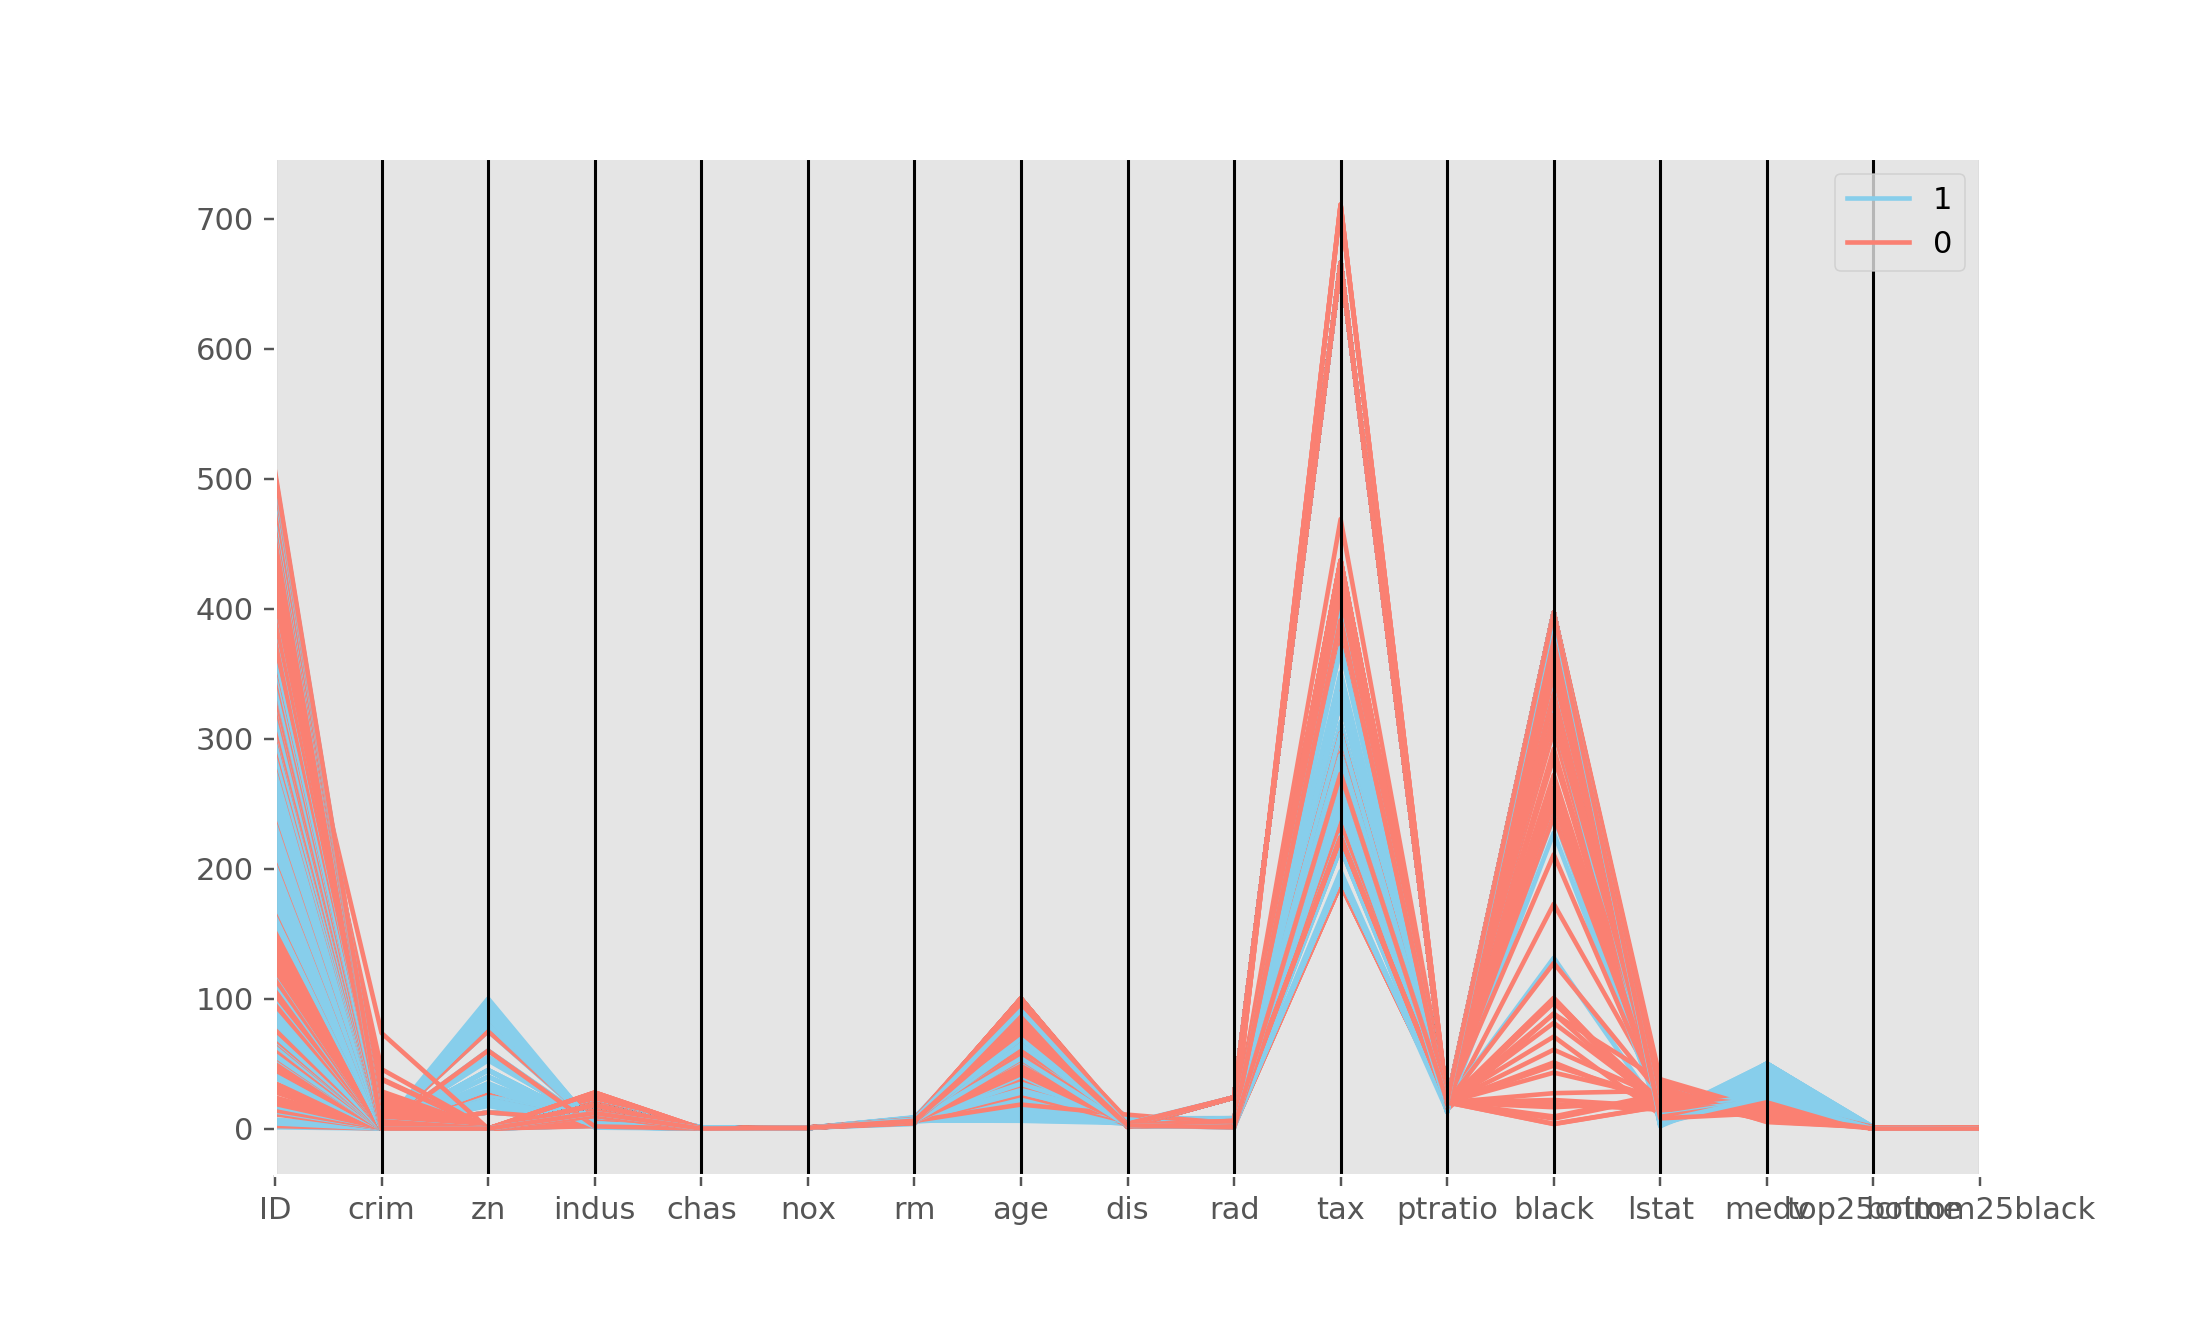

In [9]:
# split on medv, make a new column, 1 = top 50%, 0 = bottom 50% median value
# 50th percentile of medv = 21.6

df['top50medv'] = df['medv'].map(lambda x: 1 if x > 21.6 else 0)

colormap = ('skyblue', 'salmon')
# fig4 = plt.figure(figsize=(10,6))
# ax1 = fig4.add_subplot(111)
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(df, 'top50medv', color=colormap);

<IPython.core.display.Javascript object>


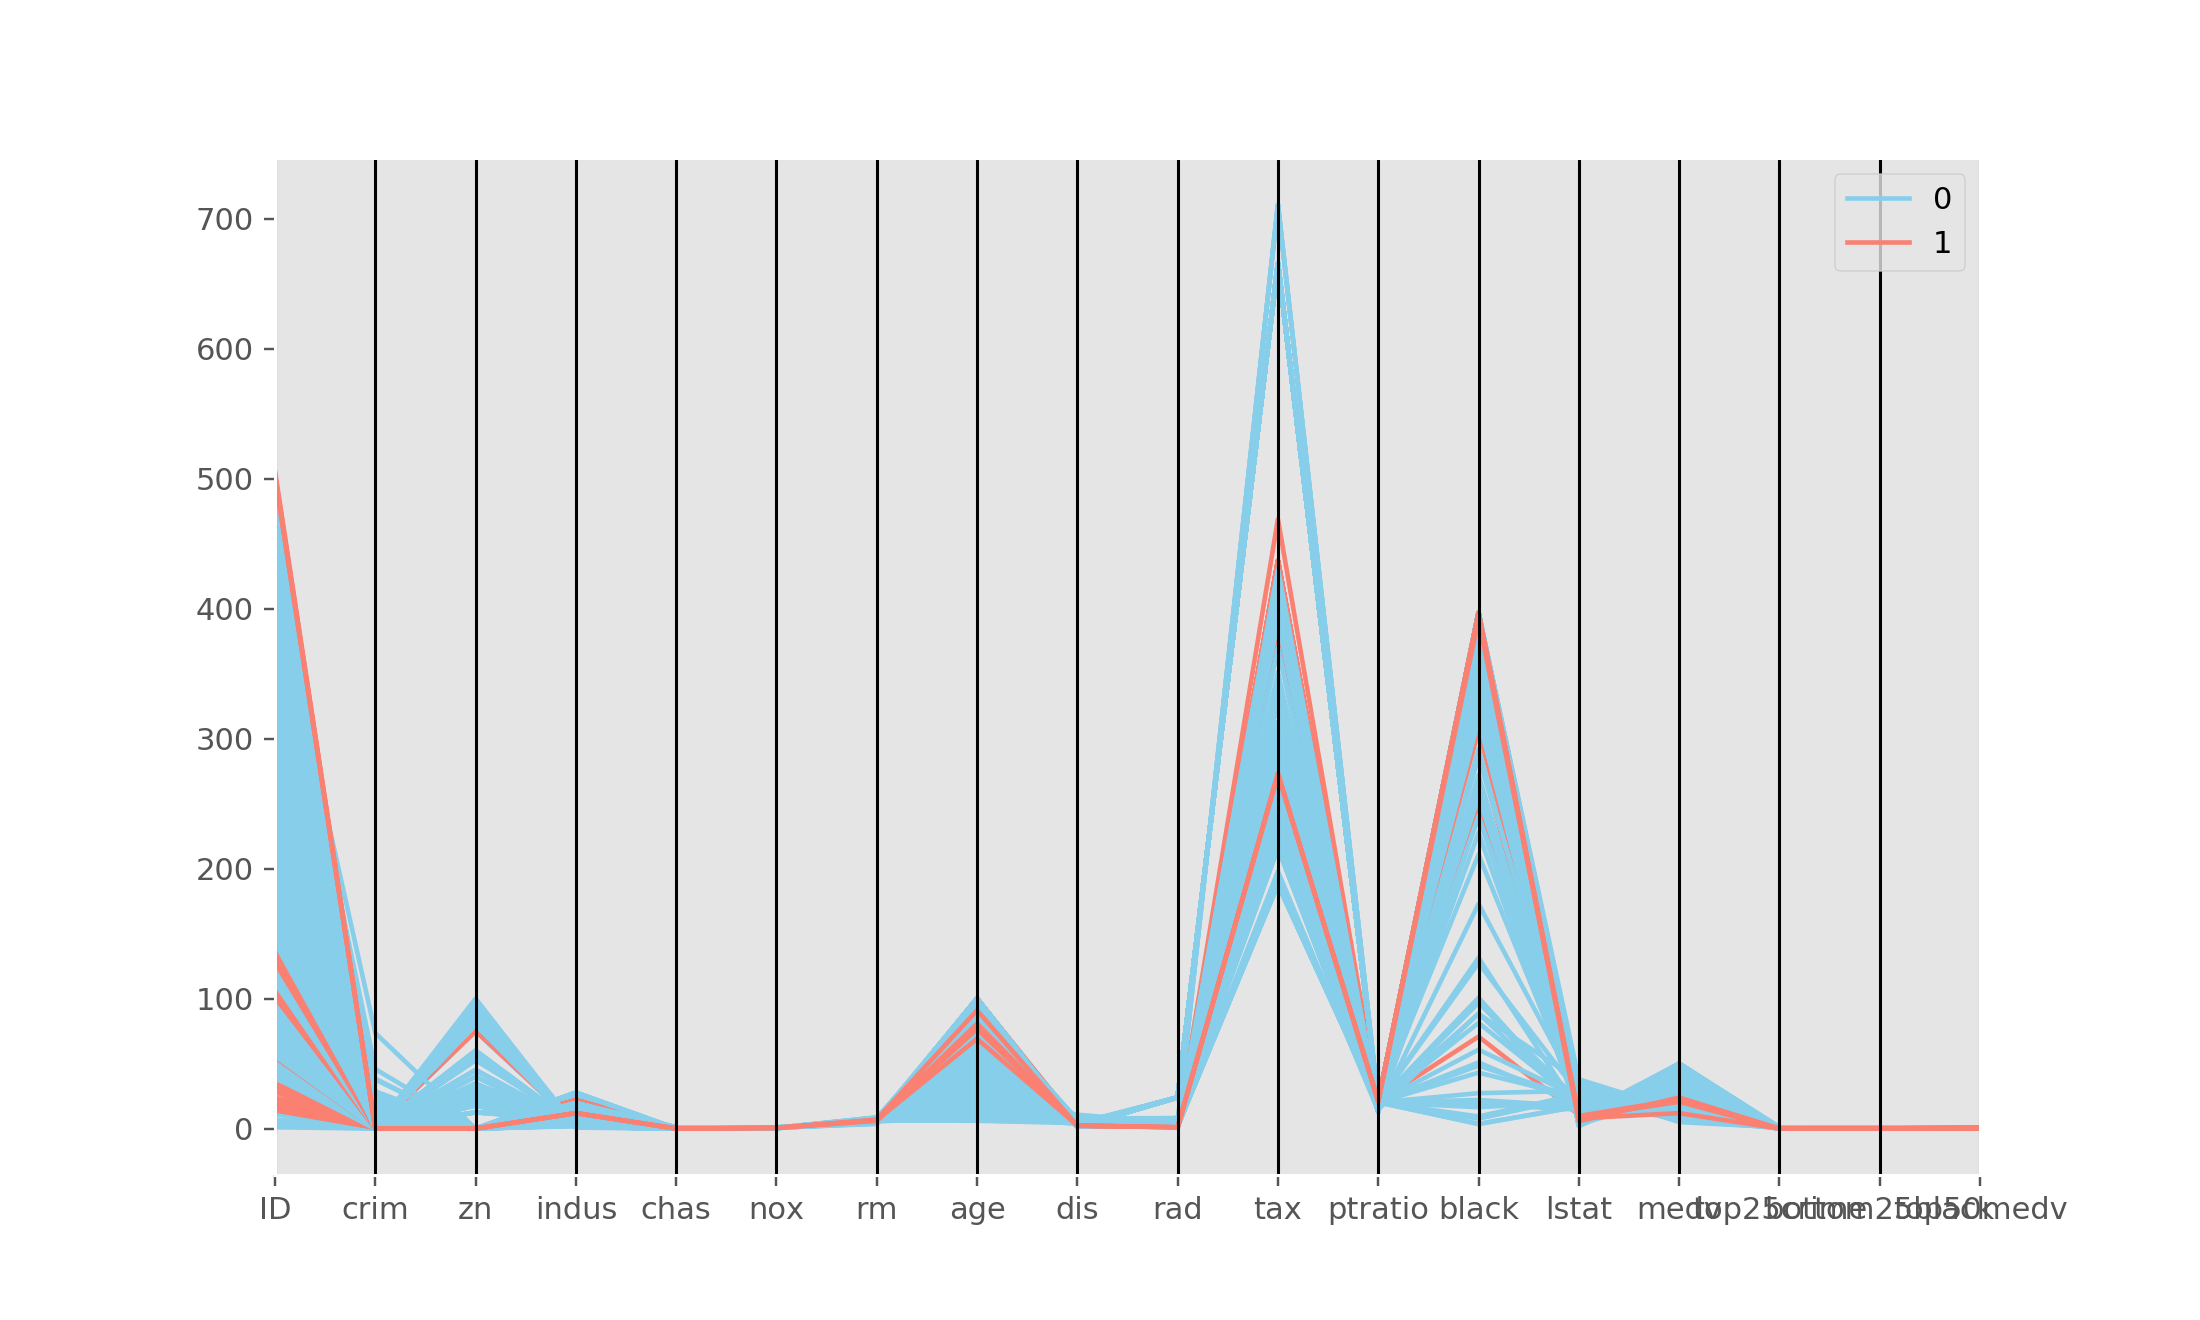

In [10]:
# split on ptratio, make a new column, 1 = top 25%, 0 = bottom 75% pupil/teacher ratio
# 25th percentile = 17.40
# 50th percentile = 19.0
# 75th percentile = 20.2
df['top25pt'] = df['ptratio'].map(lambda x: 1 if x > 20.2 else 0)

colormap = ('skyblue', 'salmon')
# fig5 = plt.figure(figsize=(15,6))
# ax1 = fig5.add_subplot(111)
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(df, 'top25pt', color=colormap);

<IPython.core.display.Javascript object>


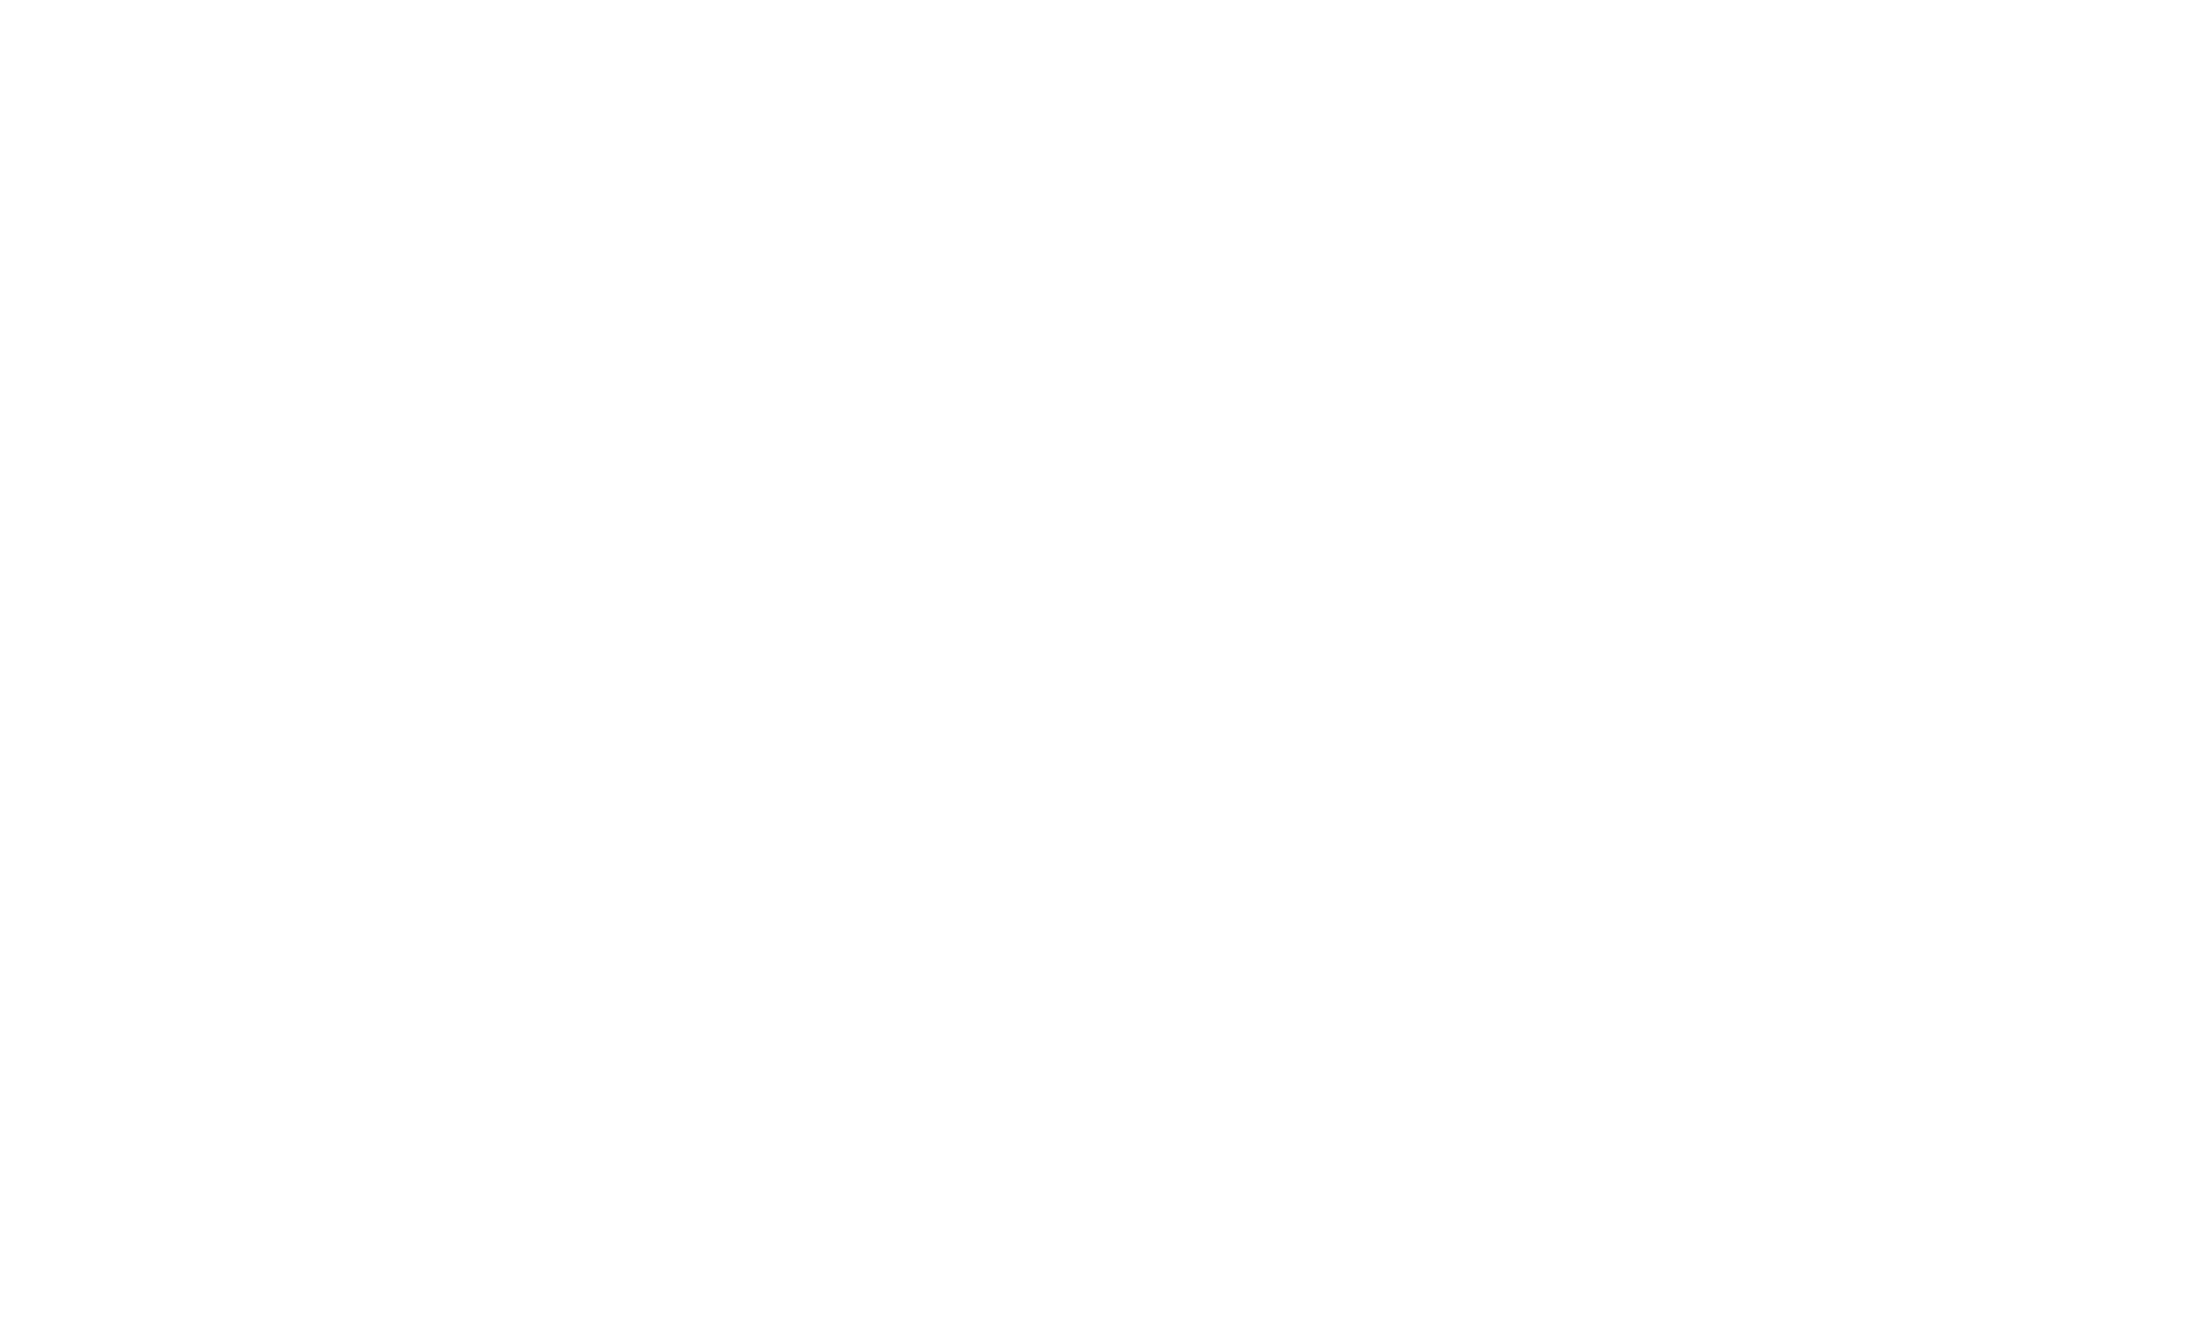

<IPython.core.display.Javascript object>


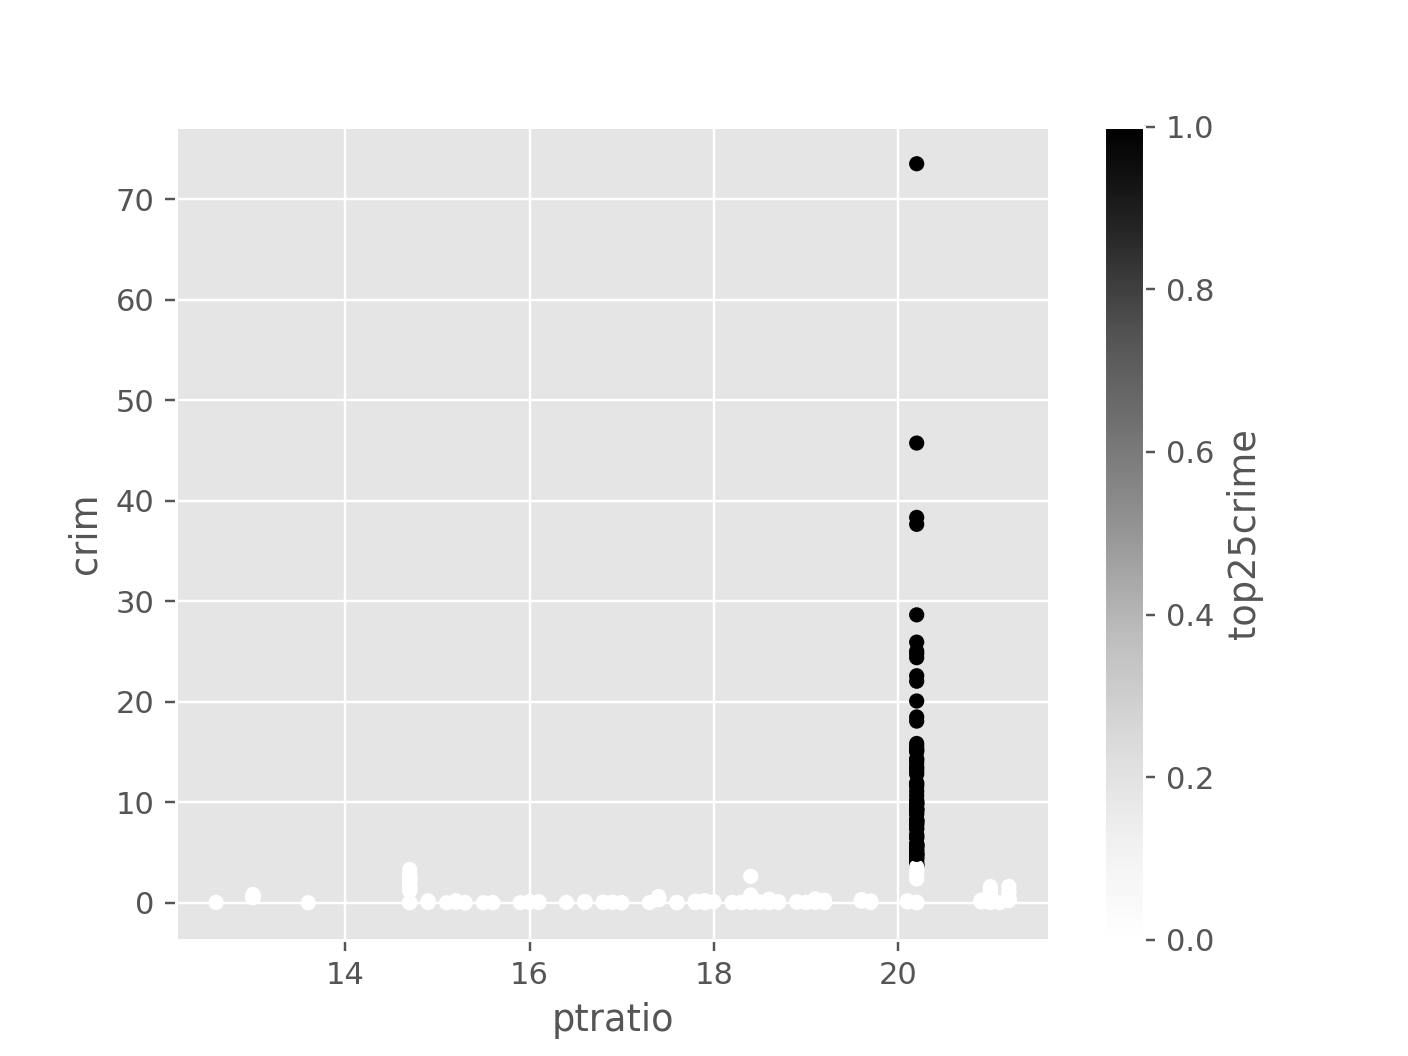

In [16]:
plt.figure(figsize=(10,6))
df.plot.scatter('ptratio', 'crim',
                      c = 'top25crime')

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!